# Building the model (multikernal SVM)

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import nbimporter
import performance_measure

Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from multiscorer.ipynb


In [2]:
def train_svm_model_balanced(X_train,y_train, X_test):
    # 
    svm = SVC(kernel='poly', gamma='auto', random_state=12,class_weight='balanced')

    # Fitting the model
    svm.fit(X_train, y_train)

    # Predicting values
    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)

    return svm, y_train_pred, y_test_pred

In [3]:
def train_svm_model(X_train,y_train, X_test):
    # 
    svm = SVC(kernel='poly', gamma='auto', random_state=12)

    # Fitting the model
    svm.fit(X_train, y_train)

    # Predicting values
    y_train_pred = svm.predict(X_train)
    y_test_pred = svm.predict(X_test)

    return svm, y_train_pred, y_test_pred

In [4]:
def get_svm_model_balanced(X_train, X_test, y_train, y_test):
    print('Loading...')
    print('Training...')
    svm, y_train_pred, y_test_pred = train_svm_model_balanced(X_train,y_train, X_test)
    print('Training Complete')
    print('Plotting Confusion Matrix...')
    performance_measure.plot_confusion_matrix(y_test,y_test_pred, normalize=True)
    print('Plotting Performance Measure...')
    performance_measure.get_performance_measures(y_test, y_test_pred)
    return svm
    

In [5]:
def get_svm_model(X_train, X_test, y_train, y_test):
    print('Loading...')
    print('Training...')
    svm, y_train_pred, y_test_pred = train_svm_model(X_train,y_train, X_test)
    print('Training Complete')
    print('Plotting Confusion Matrix...')
    performance_measure.plot_confusion_matrix(y_test,y_test_pred, normalize=True)
    print('Plotting Performance Measure...')
    performance_measure.get_performance_measures(y_test, y_test_pred)
    return svm

### Testing with toy dataset from sklearn

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.05555556 0.05555556 0.88888889]]


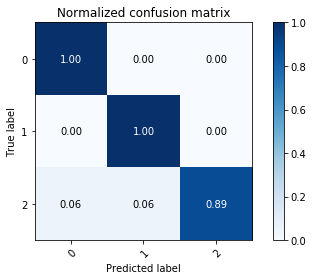

Plotting Performance Measure...
Total Accuracy 		0.966

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
0                         	 0.950 		 1.000 		 0.974
1                         	 0.957 		 1.000 		 0.978
2                         	 1.000 		 0.889 		 0.941


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=12, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
from sklearn.datasets import load_wine
data = load_wine()


X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target)
y = np.array(y)
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

svm, y_train_pred, y_test_pred = train_svm_model(X_train, y_train, X_test)
get_svm_model(X_train, X_test, y_train, y_test)